In [1]:
#Tarvittavien kirjastojen tuominen.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import quandl
quandl.ApiConfig.api_key = "kToVe9wpzcF9i3zmYBy1"

In [2]:
#Euroalueen inflaatiota kuvaavan datan tuominen Quandlista.
inflaatio = quandl.get('RATEINF/CPI_EUR', column_index='1')
inflaatio.head()

,Value
Date,
1990-01-31,69.46
1990-02-28,69.71
1990-03-31,69.88
1990-04-30,70.14
1990-05-31,70.30


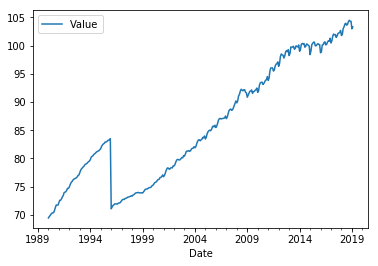

In [3]:
#Inflaatiokehitys 1989-2019.
inflaatio.plot()

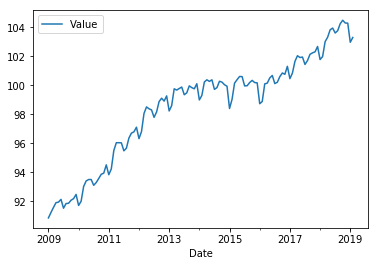

In [4]:
#Inflaatiokehitys vuosina 2009-2019.
inflaatio['2009':].plot()

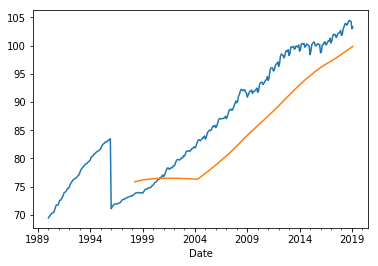

In [5]:
#Inflaation kehitys ja liukuvan keskiarvon kuvaaja oranssina.
inflaatio["Value"].plot()
inflaatio["Value"].rolling(100).mean().plot()

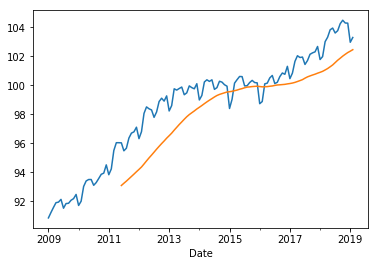

In [6]:
#Inflaatiokehitys vuosina 2009-2019 sekä liukuvan keskiarvon kuvaaja oranssina.
inflaatio["Value"]["2009":].plot()
inflaatio["Value"]["2009":].rolling(30).mean().plot()

In [8]:
#Euroopan hiilidioksidipäästöt.
eurooppa = quandl.get('BP/C02_EMMISSIONS_EUR')
eurooppa.head().style.format('{:.2f}')

,Value
Date,
1965-12-31 00:00:00,3424.14
1966-12-31 00:00:00,3470.39
1967-12-31 00:00:00,3538.10
1968-12-31 00:00:00,3751.86
1969-12-31 00:00:00,4006.90


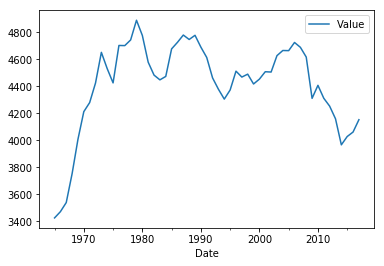

In [9]:
#Hiilidioksidipäästöt Euroopassa 1970-2010.
eurooppa.plot()

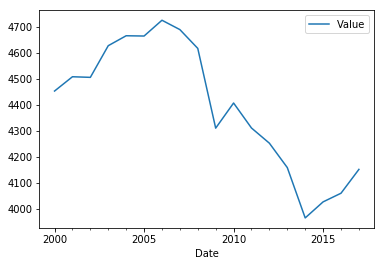

In [10]:
#Euroopan hiilidioksidipäästöt 2000-luvulla.
eurooppa['2000':].plot()

In [11]:
#Islannin hiilidioksidipäästöt.
islanti = quandl.get('BP/C02_EMMISSIONS_ISL')
islanti.head().style.format('{:.2f}')

,Value
Date,
1965-12-31 00:00:00,1.50
1966-12-31 00:00:00,1.60
1967-12-31 00:00:00,1.55
1968-12-31 00:00:00,1.65
1969-12-31 00:00:00,1.51


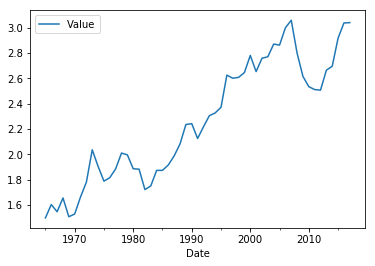

In [12]:
#Islannin hiilidioksidipäästöt 1970-2010.
islanti.plot()

Text(0.5, 1.0, 'EUROOPAN JA ISLANNIN HIILIDIOKSIDIPÄÄSTÖT')

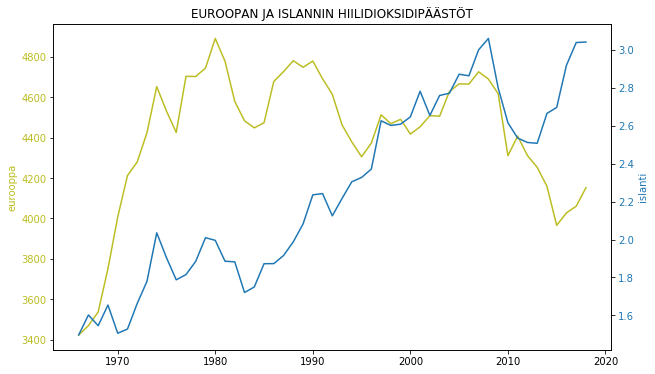

In [13]:
#Euroopan ja Islannin hiilidioksidipäästöt.
fig1, ax1 = plt.subplots(figsize = (10, 6))
color = 'C8'
ax1.set_ylabel('eurooppa', color=color)
ax1.plot(eurooppa['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)
ax2 = ax1.twinx()
color = 'C0'
ax2.set_ylabel('islanti', color=color)
ax2.plot(islanti['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)
plt.title("EUROOPAN JA ISLANNIN HIILIDIOKSIDIPÄÄSTÖT")

In [14]:
#Latvian ja islannin hiilidioksidipäästöt.
latvia=quandl.get('BP/C02_EMMISSIONS_LVA')
lvaisl=pd.concat([islanti['Value']['2007':], latvia['Value']['2007':]], axis=1)
lvaisl.columns=['islanti', 'latvia']
lvaisl.head()

,islanti,latvia
Date,,
2007-12-31,3.059076,8.781712
2008-12-31,2.798592,8.641523
2009-12-31,2.615074,7.914477
2010-12-31,2.534311,9.101032
2011-12-31,2.511254,8.175174


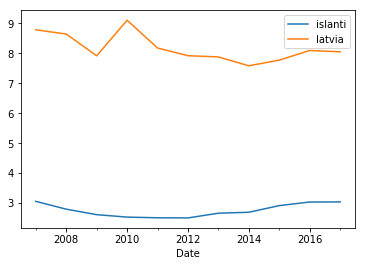

In [15]:
#Latvian ja Islannin hiilidioksidipäästöt kaaviona.
lvaisl.plot()

In [16]:
#Latvian ja Islannin hiilidioksidipäästöjen muutosprosentit.
lvaisl['lvamuutos']=lvaisl['latvia'].pct_change()
lvaisl['islmuutos']=lvaisl['islanti'].pct_change()
lvaisl.head()

,islanti,latvia,lvamuutos,islmuutos
Date,,,,
2007-12-31,3.059076,8.781712,NaN,NaN
2008-12-31,2.798592,8.641523,-0.015964,-0.085151
2009-12-31,2.615074,7.914477,-0.084134,-0.065575
2010-12-31,2.534311,9.101032,0.149922,-0.030884
2011-12-31,2.511254,8.175174,-0.101731,-0.009098


In [17]:
#Hiilidioksidipäästöjen korrelaatio Islannin ja Latvian välillä.
lvaisl[['lvamuutos','islmuutos']].corr()

,lvamuutos,islmuutos
lvamuutos,1.000000,0.187187
islmuutos,0.187187,1.000000


Text(0.5, 1.0, 'LATVIAN JA ISLANNIN HIILIDIOKSIDIPÄÄSTÖT')

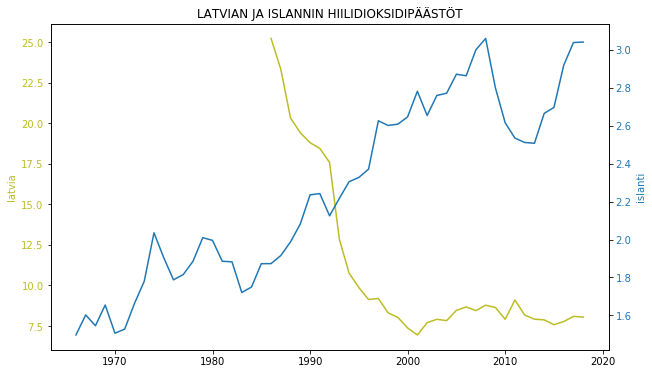

In [18]:
#Latvian ja Islannin hiilidioksidipäästöt samassa kaaviossa.
fig1, ax1 = plt.subplots(figsize = (10, 6))
color = 'C8'
ax1.set_ylabel('latvia', color=color)
ax1.plot(latvia['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)
ax2 = ax1.twinx()
color = 'C0'
ax2.set_ylabel('islanti', color=color)
ax2.plot(islanti['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)
plt.title("LATVIAN JA ISLANNIN HIILIDIOKSIDIPÄÄSTÖT")